# Futebol brasileiro (brasileirão/copa/liberta) - GRUPO 1

**Membros do Grupo 01:**
- Amanda Yamasaki
- Gabriel Grub
- Maria Dulce Matos
- Paulo Sergio
- Theo Borten

###  Projeto

**Hipóteses:**

1- O horário da partida influencia significativamente a dinâmica do jogo, demonstrando uma relação entre o horário de início e a quantidade de gols marcados, bem como o resultado final.

2- Há uma correlação positiva entre o desempenho recente de um clube, medido pelos resultados dos três jogos anteriores, e o desempenho no jogo subsequente.

3- Existe uma correlação positiva entre a classificação dos clubes nos campeonatos da Libertadores, Brasileirão e Copa do Brasil, indicando uma tendência consistente de desempenho entre essas competições.

**Resumo:**

**Motivação:** 

Ao contrário de loterias numéricas ou jogos com dados (cujos dados são justos), a “loteria esportiva” do futebol não é caracterizada por seus números equiprováveis. No futebol, jogos costumeiramente têm times favoritos e fatores internos e externos não quantificados no cálculo de probabilidades - como o emocional dos jogadores e as condições do ambiente da partida. Levando essa subjetividade em consideração, pode-se dizer que há uma distribuição de probabilidade desigual entre os possíveis resultados. É com este tipo de problema que nos deparamos ao tentar tratar o Campeonato Brasileiro probabilisticamente, e então, realizamos hipóteses para verificar correlações e padrões-ocultos entre dados coletados sobre torneios dos últimos anos no Brasil. Logo, temos como objetivo destrinchar os inúmeros fatores que influenciam nas probabilidades de resultado de um jogo de futebol, e sobretudo analisar como esses detalhes se revelam através dos dados numéricos sobre torneios no Brasil.

### Importando as bibliotecas necessárias e carregando a base de dados para utilização no Python

In [64]:
import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
import seaborn as sn
from datetime import datetime

brasileirao = pd.read_csv('brasileirao.csv')
copa_do_brasil = pd.read_csv("copa_do_brasil.csv")
libertadores = pd.read_csv("libertadores.csv")

### Descrição das bases de dados e suas principais características.

#### Brasileirão

In [65]:
brasileirao.info() # Pegando informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         4180 non-null   object 
 1   home_team        4180 non-null   object 
 2   home_team_state  4180 non-null   object 
 3   away_team        4180 non-null   object 
 4   away_team_state  4180 non-null   object 
 5   home_goal        4098 non-null   float64
 6   away_goal        4098 non-null   float64
 7   season           4180 non-null   int64  
 8   round            4180 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 294.0+ KB


***Número de linhas:*** 4180

***Número de colunas:*** 9

***Memória alocada para a base de dados:*** 294.0+ KB

***Tipos de dados:***

- inteiro(2)

- ponto flutuante(2)

- objeto(5)

***Tipo de dado de cada coluna:***

- Coluna 1: Data e hora (data)

- Coluna 2: Time da casa (string)

- Coluna 3: Estado do time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Estado do time visitante (string)

- Coluna 6: Gol em casa (ponto flutuante)

- Coluna 7: Gol fora de casa (ponto flutuante)

- Coluna 8: Temporada (inteiro)

- Coluna 9: Rodada (inteiro)

**Distribuição dos valores das principais variáveis categóricas/strings**

In [66]:
print(f'Temporadas: {brasileirao["season"].unique()}') #Temporadas a que se referem os dados

print(f'Todos os clubes: {brasileirao["home_team"].nunique()}') #Números de clubes que jogaram na Copa do Brasil ao longo desses anos

Temporadas: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Todos os clubes: 36


#### Copa do Brasil

In [67]:
copa_do_brasil.info() # Pegando algumas informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   round      1337 non-null   int64  
 1   datetime   1337 non-null   object 
 2   home_team  1337 non-null   object 
 3   away_team  1337 non-null   object 
 4   home_goal  1321 non-null   float64
 5   away_goal  1321 non-null   float64
 6   season     1337 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


***Número de linhas:*** 1337

***Número de colunas:*** 7

***Memória alocada para a base de dados:*** 73.2+ KB

***Tipos de dados:***

- inteiro(2)

- ponto flutuante(2)

- objeto(3)

***Tipo de dado de cada coluna:***

- Coluna 1: Rodada (inteiro)

- Coluna 2: Data e hora (data)

- Coluna 3: Time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Gol em casa (ponto flutuante)

- Coluna 6: Gol fora de casa (ponto flutuante)

- Coluna 7: Temporada (inteiro)

**Distribuição dos valores das principais variáveis categóricas/strings**

In [68]:
print(f'Temporadas: {copa_do_brasil["season"].unique()}') #Temporadas a que se referem os dados

print(f'Todos os clubes: {copa_do_brasil["home_team"].nunique()}') #Números de clubes que jogaram na Copa do Brasil ao longo desses anos

Temporadas: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Todos os clubes: 275


#### Libertadores

In [69]:
libertadores.info() # Pegando algumas informações da base de dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1254 non-null   object 
 1   home_team  1255 non-null   object 
 2   away_team  1255 non-null   object 
 3   home_goal  1255 non-null   object 
 4   away_goal  1255 non-null   object 
 5   season     1254 non-null   float64
 6   stage      1255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.8+ KB


***Número de linhas:*** 1255

***Número de colunas:*** 7

***Memória alocada para a base de dados:*** 68.8+ KB

***Tipos de dados:***

- ponto flutuante(1)

- objeto(6)

***Tipo de dado de cada coluna:***

- Coluna 2: Data e hora (data)

- Coluna 3: Time da casa (string)

- Coluna 4: Time visitante (string)

- Coluna 5: Gol em casa (int)

- Coluna 6: Gol fora de casa (int)

- Coluna 7: Temporada (ponto flutuante)

- Coluna 7: Etapas do campeonato (string)

**Distribuição dos valores das principais variáveis categóricas/strings**

In [70]:
print(f'Temporadas: {libertadores["season"].unique()}') #Temporadas a que se referem os dados

print(f'Etapas do campeonato: {libertadores["stage"].unique()}') #Etapas do campeonato

print(f'Total de clubes: {libertadores["home_team"].nunique()}') #Números de clubes que jogaram a libertadores ao longo desses anos

Temporadas: [2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.   nan]
Etapas do campeonato: ['group stage' 'final' 'semifinals' 'quarterfinals' 'round of 16']
Total de clubes: 114


### Filtrando os dados

In [71]:
valor_indesejado = 2022
libertadores = libertadores.drop(libertadores[libertadores['season'] == valor_indesejado].index)

valor_indesejado = 2012
copa_do_brasil = copa_do_brasil.drop(copa_do_brasil[copa_do_brasil['season'] == valor_indesejado].index)

valor_indesejado = 2012
brasileirao = brasileirao.drop(brasileirao[brasileirao['season'] == valor_indesejado].index)

valor_indesejado = 2022
brasileirao = brasileirao.drop(brasileirao[brasileirao['season'] == valor_indesejado].index)

In [72]:
print(f'Temporadas: {libertadores["season"].unique()}')
print(f'Temporadas: {copa_do_brasil["season"].unique()}')
print(f'Temporadas: {brasileirao["season"].unique()}')

Temporadas: [2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.   nan]
Temporadas: [2013 2014 2015 2016 2017 2018 2019 2020 2021]
Temporadas: [2013 2014 2015 2016 2017 2018 2019 2020 2021]


### Limpando os dados

#### Libertadores

In [73]:
print(f'Valores nulos nos dados da Libertadores inicialmente: \n{libertadores.isna().sum()}\n')

libertadores.iloc[363, libertadores.columns.get_loc('home_goal')] = 0
libertadores.iloc[363, libertadores.columns.get_loc('away_goal')] = 3
libertadores.iloc[363, libertadores.columns.get_loc('home_goal')] = 0
libertadores.drop(index = 1254, inplace=True)

print(f'Valores nulos nos dados da Libertadores após a limpeza: \n{libertadores.isna().sum()}\n')

Valores nulos nos dados da Libertadores inicialmente: 
datetime     1
home_team    0
away_team    0
home_goal    0
away_goal    0
season       1
stage        0
dtype: int64

Valores nulos nos dados da Libertadores após a limpeza: 
datetime     0
home_team    0
away_team    0
home_goal    0
away_goal    0
season       0
stage        0
dtype: int64



#### Brasileirão

In [74]:
print(f'Valores nulos nos dados do Brasileirão: \n{brasileirao.isna().sum()}\n')

brasileirao.iloc[1517, brasileirao.columns.get_loc('home_goal')] = 1
brasileirao.iloc[1517, brasileirao.columns.get_loc('away_goal')] = 3

print(f'Valores nulos nos dados do Brasileirão: \n{brasileirao.isna().sum()}\n')

Valores nulos nos dados do Brasileirão: 
datetime           0
home_team          0
home_team_state    0
away_team          0
away_team_state    0
home_goal          1
away_goal          1
season             0
round              0
dtype: int64

Valores nulos nos dados do Brasileirão: 
datetime           0
home_team          0
home_team_state    0
away_team          0
away_team_state    0
home_goal          0
away_goal          0
season             0
round              0
dtype: int64



#### Copa do Brasil

In [75]:
print(f'Valores nulos nos dados do Copa do Brasil: \n{copa_do_brasil.isna().sum()}')

copa_do_brasil.drop(index=range(1321, 1337), inplace=True)

print(f'Valores nulos nos dados do Copa do Brasil: \n{copa_do_brasil.isna().sum()}')

Valores nulos nos dados do Copa do Brasil: 
round         0
datetime      0
home_team     0
away_team     0
home_goal    16
away_goal    16
season        0
dtype: int64
Valores nulos nos dados do Copa do Brasil: 
round        0
datetime     0
home_team    0
away_team    0
home_goal    0
away_goal    0
season       0
dtype: int64


### Análise dos dados

**Matriz de Correlação - Libertadores**

<Axes: >

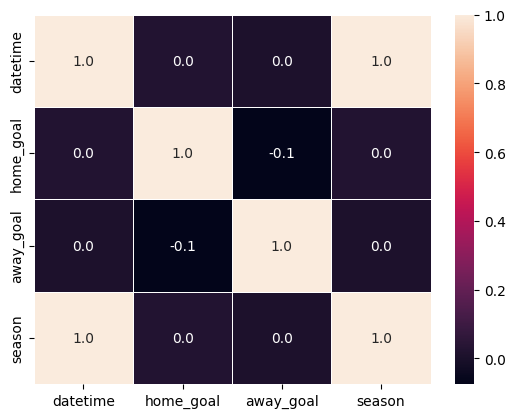

In [76]:
libertadores.replace('-', float('nan'), inplace=True)

libertadores['datetime'] = pd.to_datetime(libertadores['datetime']).astype('int64')
libertadores['home_goal'] = pd.to_numeric(libertadores['home_goal'])
libertadores['away_goal'] = pd.to_numeric(libertadores['away_goal'])

numericos_libertadores = libertadores.select_dtypes(include='number')

matriz_correlacao_libertadores = numericos_libertadores.corr()

plot = sn.heatmap(matriz_correlacao_libertadores, annot = True, fmt=".1f", linewidths=.6)

plot

<Axes: >

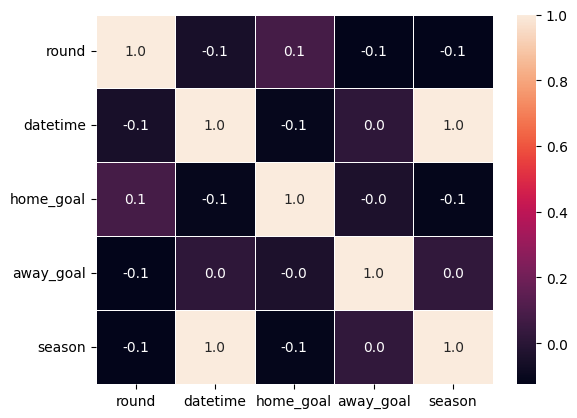

In [77]:
copa_do_brasil.replace('-', float('nan'), inplace=True)

copa_do_brasil['datetime'] = pd.to_datetime(copa_do_brasil['datetime']).astype('int64')
copa_do_brasil['home_goal'] = pd.to_numeric(copa_do_brasil['home_goal'])
copa_do_brasil['away_goal'] = pd.to_numeric(copa_do_brasil['away_goal'])

numericos_copa_do_brasil = copa_do_brasil.select_dtypes(include='number')

matriz_correlacao_copa_do_brasil = numericos_copa_do_brasil.corr()

plot = sn.heatmap(matriz_correlacao_copa_do_brasil, annot = True, fmt=".1f", linewidths=.6)

plot

<Axes: >

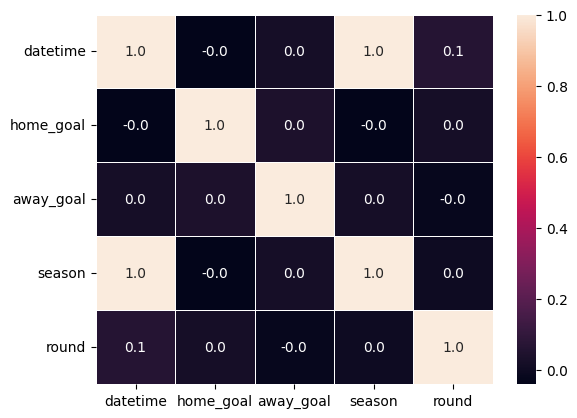

In [78]:
brasileirao.replace('-', float('nan'), inplace=True) #Trocando as "-" por "Nan"

brasileirao['datetime'] = pd.to_datetime(brasileirao['datetime']).astype('int64')
brasileirao['home_goal'] = pd.to_numeric(brasileirao['home_goal'])
brasileirao['away_goal'] = pd.to_numeric(brasileirao['away_goal'])

numericos_brasileirao = brasileirao.select_dtypes(include='number')

matriz_correlacao_brasileirao = numericos_brasileirao.corr()

plot = sn.heatmap(matriz_correlacao_brasileirao, annot = True, fmt=".1f", linewidths=.6)

plot

### Funções

In [79]:
brasileirao["datetime"] = pd.to_datetime(brasileirao["datetime"])
brasileirao["time"] = brasileirao["datetime"].dt.time


def won_match(team1, team2, result1, result2):
    """Recebe dois times, e os gols feitos por cada um no jogo, e retorna o nome do vencedor, e o empate caso não tenha"""
    if result1 == result2:  # draw
        return "Draw"
    if result2 > result1:  # result 2 ganha
        return team2
    else:
        return team1  # result 1 ganha


teams = brasileirao["home_team"].unique()
# mudar para listas?


def classificação(data_frame):
    tabela = teams  # trbalhar com dicionarios)
    tabela = {team: 0 for team in tabela}
    for _, row in data_frame.iterrows():
        result = won_match(
            row["home_team"],
            row["away_team"],
            row["home_goal"],
            row["away_goal"],
        )
        if result != "Draw":
            tabela[result] += 3
        else:
            tabela[row["home_team"]] += 1
            tabela[row["away_team"]] += 1

    tabela = dict(
        sorted(tabela.items(), key=lambda x: x[1], reverse=True)
    )  # sort dos dados para ficar em ordem
    return tabela

#print(brasileirao.columns)
#print(brasileirao.head())

Index(['datetime', 'home_team', 'home_team_state', 'away_team',
       'away_team_state', 'home_goal', 'away_goal', 'season', 'round', 'time'],
      dtype='object')
               datetime         home_team home_team_state         away_team  \
380 2013-05-25 18:30:00  Vasco da Gama-RJ              RJ     Portuguesa-SP   
381 2013-05-25 18:30:00        Vitoria-BA              BA  Internacional-RS   
382 2013-05-25 21:00:00    Corinthians-SP              SP       Botafogo-RJ   
383 2013-05-26 16:00:00         Gremio-RS              RS        Nautico-PE   
384 2013-05-26 16:00:00    Ponte Preta-SP              SP      Sao Paulo-SP   

    away_team_state  home_goal  away_goal  season  round      time  
380              SP        1.0        0.0    2013      1  18:30:00  
381              RS        2.0        2.0    2013      1  18:30:00  
382              RJ        1.0        1.0    2013      1  21:00:00  
383              PE        2.0        0.0    2013      1  16:00:00  
384           